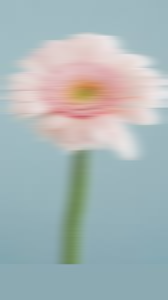

-1

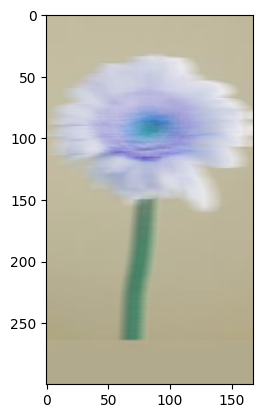

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/images.png')
plt.imshow(image)
size = 15

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
output = cv2.filter2D(image, -1, kernel_motion_blur)
cv2_imshow(output)
cv2.waitKey(0)

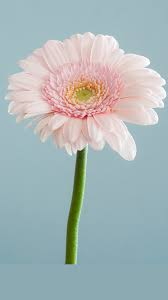

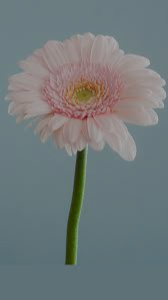

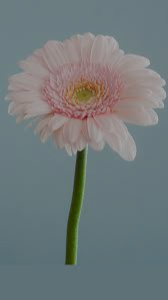

In [ ]:
kernal_identity= np.array([[0,0,0],[0,1,0],[0,0,0]])
kernal_3= np.array((3,3),dtype=np.float32)/9.0
kernal_11= np.array((11,11),dtype=np.float32)/121.0
#Apply the filter
output1=cv2.filter2D(image,-1, kernal_identity)
output2=cv2.filter2D(image,-1, kernal_3)
output3=cv2.filter2D(image,-1, kernal_11)
#image show
cv2_imshow(output1)
cv2_imshow(output2)
cv2_imshow(output2)

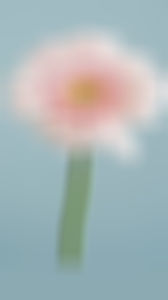

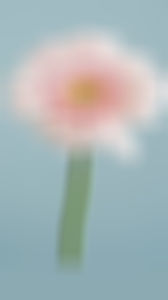

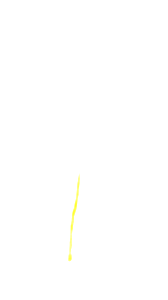

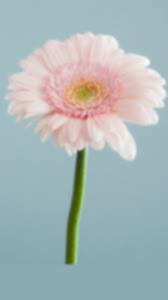

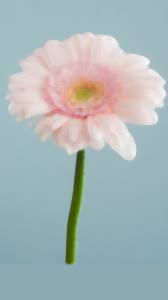

In [ ]:
kernal_25=np.ones((25,25),np.float32)/625.0
output_kernal=cv2.filter2D(image, -1,kernal_25)
cv2_imshow(output_kernal)
blurfilter=cv2.blur(image,(25,25))
output_boxfilter=cv2.boxFilter(image,-1,(5,5),normalize=False)
cv2_imshow(blurfilter)
cv2_imshow(output_boxfilter)
output_gus=cv2.GaussianBlur(image,(5,5),0)
cv2_imshow(output_gus)
medianblur=cv2.medianBlur(image,5)
cv2_imshow(medianblur)


#In Gaussian Blur operation, the image is convolved with a Gaussian filter instead of the box filter. The Gaussian filter is a low-pass filter that removes the high-frequency components are reduced.

#You can perform this operation on an image using the Gaussianblur() method of the imgproc class. Following is the syntax of this method −

#GaussianBlur(src, dst, ksize, sigmaX)
#This method accepts the following parameters −

#src − A Mat object representing the source (input image) for this operation.

#dst − A Mat object representing the destination (output image) for this operation.

#ksize − A Size object representing the size of the kernel.

#sigmaX − A variable of the type double representing the Gaussian kernel standard deviation in X direction.

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

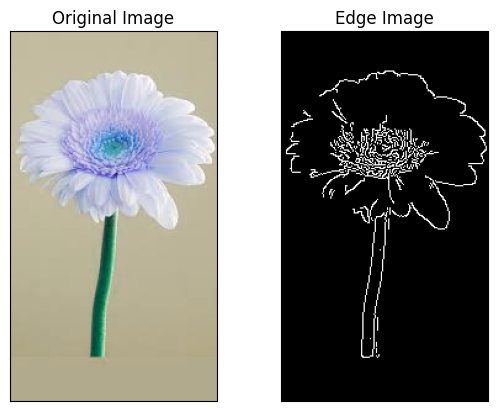

In [ ]:
edges = cv2.Canny(image,100,200)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

[  0.           0.99609375   1.9921875    2.98828125   3.984375
   4.98046875   5.9765625    6.97265625   7.96875      8.96484375
   9.9609375   10.95703125  11.953125    12.94921875  13.9453125
  14.94140625  15.9375      16.93359375  17.9296875   18.92578125
  19.921875    20.91796875  21.9140625   22.91015625  23.90625
  24.90234375  25.8984375   26.89453125  27.890625    28.88671875
  29.8828125   30.87890625  31.875       32.87109375  33.8671875
  34.86328125  35.859375    36.85546875  37.8515625   38.84765625
  39.84375     40.83984375  41.8359375   42.83203125  43.828125
  44.82421875  45.8203125   46.81640625  47.8125      48.80859375
  49.8046875   50.80078125  51.796875    52.79296875  53.7890625
  54.78515625  55.78125     56.77734375  57.7734375   58.76953125
  59.765625    60.76171875  61.7578125   62.75390625  63.75
  64.74609375  65.7421875   66.73828125  67.734375    68.73046875
  69.7265625   70.72265625  71.71875     72.71484375  73.7109375
  74.70703125  75.703125   

<BarContainer object of 256 artists>

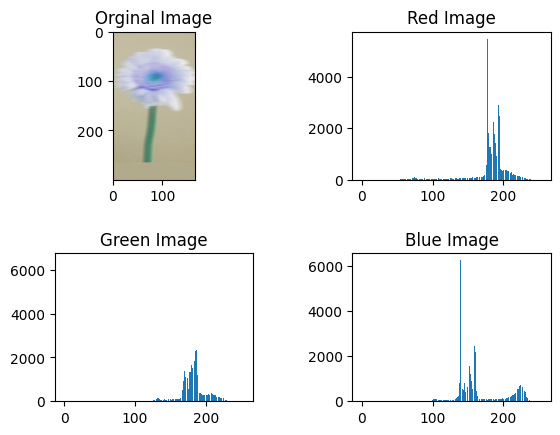

In [ ]:
r=image[:,:,0]
g=image[:,:,1]
b=image[:,:,2]
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.subplot(2,2,1)
plt.title('Orginal Image')
plt.imshow(image)

plt.subplot(2,2,2)
plt.title('Red Image')
hist,bins=np.histogram(r.ravel(),bins=256, range=(0,255))
plt.bar(bins[:-1],hist)

plt.subplot(2,2,3)
plt.title('Green Image')
hist,bins=np.histogram(g.ravel(),bins=256, range=(0,255))
plt.bar(bins[:-1],hist)

plt.subplot(2,2,4)
plt.title('Blue Image')
hist,bins=np.histogram(b.ravel(),bins=256, range=(0,255))
plt.bar(bins[:-1],hist)

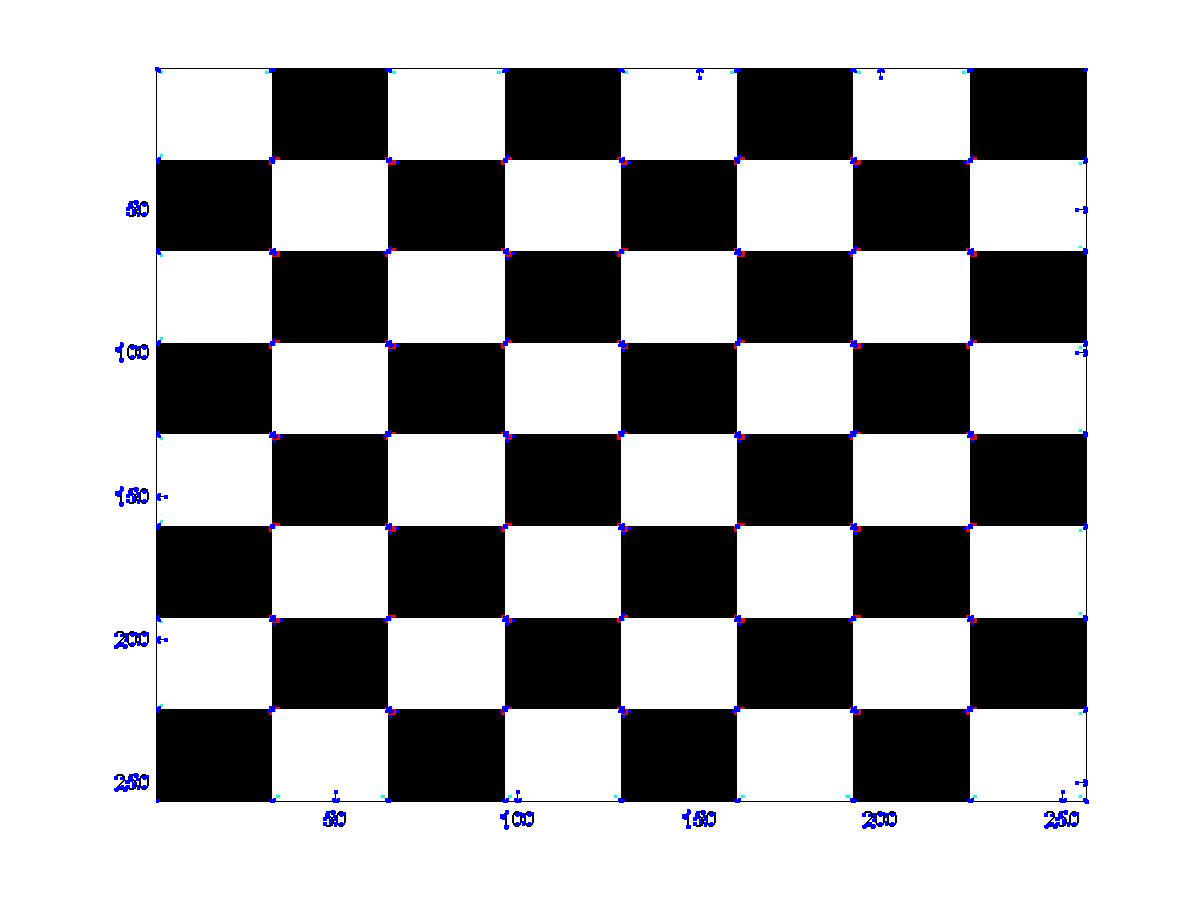

In [ ]:

# Python program to illustrate
# corner detection with
# Harris Corner Detection Method

# organizing imports
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# path to input image specified and
# image is loaded with imread command
image = cv2.imread('/content/chessboard_harris.jpg')

# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)


# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)

# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[255, 0, 0]

# the window showing output image with corners
cv2_imshow(image)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()